In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
#  Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# For NN - Flatten input
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# For CNN - Reshape to 28x28x1
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#  Build Neural Network (NN) Model

In [3]:

nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train NN Model
history_nn = nn_model.fit(x_train_flat, y_train, epochs=10,
                          validation_split=0.1, batch_size=128, verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 5s - 11ms/step - accuracy: 0.8071 - loss: 0.5611 - val_accuracy: 0.8463 - val_loss: 0.4175
Epoch 2/10
422/422 - 1s - 3ms/step - accuracy: 0.8616 - loss: 0.3910 - val_accuracy: 0.8533 - val_loss: 0.3937
Epoch 3/10
422/422 - 1s - 3ms/step - accuracy: 0.8746 - loss: 0.3503 - val_accuracy: 0.8743 - val_loss: 0.3501
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.8831 - loss: 0.3246 - val_accuracy: 0.8750 - val_loss: 0.3431
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.8887 - loss: 0.3062 - val_accuracy: 0.8778 - val_loss: 0.3370
Epoch 6/10
422/422 - 1s - 3ms/step - accuracy: 0.8925 - loss: 0.2911 - val_accuracy: 0.8808 - val_loss: 0.3297
Epoch 7/10
422/422 - 1s - 3ms/step - accuracy: 0.8975 - loss: 0.2792 - val_accuracy: 0.8753 - val_loss: 0.3495
Epoch 8/10
422/422 - 1s - 3ms/step - accuracy: 0.8999 - loss: 0.2707 - val_accuracy: 0.8833 - val_loss: 0.3261
Epoch 9/10
422/422 - 1s - 3ms/step - accuracy: 0.9035 - loss: 0.2611 - val_accuracy: 0.8832 - val_loss: 0.3317


 Build CNN Model

In [4]:

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train CNN Model
history_cnn = cnn_model.fit(x_train_cnn, y_train, epochs=10,
                            validation_split=0.1, batch_size=128, verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 8s - 18ms/step - accuracy: 0.7894 - loss: 0.5869 - val_accuracy: 0.8467 - val_loss: 0.4173
Epoch 2/10
422/422 - 2s - 4ms/step - accuracy: 0.8692 - loss: 0.3677 - val_accuracy: 0.8752 - val_loss: 0.3444
Epoch 3/10
422/422 - 3s - 7ms/step - accuracy: 0.8830 - loss: 0.3207 - val_accuracy: 0.8888 - val_loss: 0.3029
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.8956 - loss: 0.2911 - val_accuracy: 0.8938 - val_loss: 0.3011
Epoch 5/10
422/422 - 3s - 6ms/step - accuracy: 0.9034 - loss: 0.2657 - val_accuracy: 0.8992 - val_loss: 0.2774
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9097 - loss: 0.2482 - val_accuracy: 0.8875 - val_loss: 0.2993
Epoch 7/10
422/422 - 3s - 6ms/step - accuracy: 0.9147 - loss: 0.2345 - val_accuracy: 0.9038 - val_loss: 0.2666
Epoch 8/10
422/422 - 3s - 7ms/step - accuracy: 0.9210 - loss: 0.2158 - val_accuracy: 0.9027 - val_loss: 0.2701
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9246 - loss: 0.2040 - val_accuracy: 0.9105 - val_loss: 0.2490


In [5]:
# Evaluate Both Models
nn_loss, nn_acc = nn_model.evaluate(x_test_flat, y_test, verbose=0)
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)

print(f"NN Test Accuracy: {nn_acc * 100:.2f}%")
print(f"CNN Test Accuracy: {cnn_acc * 100:.2f}%")


NN Test Accuracy: 88.18%
CNN Test Accuracy: 89.99%


NN Sample Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


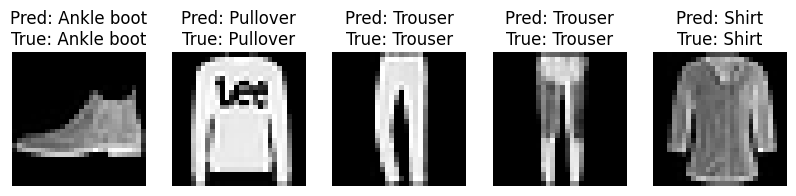

CNN Sample Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


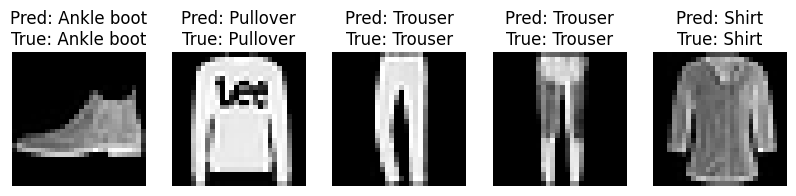

In [6]:
# Sample Predictions Function
def show_sample_predictions(model, images, labels, is_cnn=True):
    predictions = model.predict(images[:5])
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        img = images[i].reshape(28, 28) if is_cnn else images[i].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[labels[i]]}")
        plt.axis('off')
    plt.show()

# NN Predictions
print("NN Sample Predictions:")
show_sample_predictions(nn_model, x_test_flat, y_test, is_cnn=False)

# CNN Predictions
print("CNN Sample Predictions:")
show_sample_predictions(cnn_model, x_test_cnn, y_test, is_cnn=True)


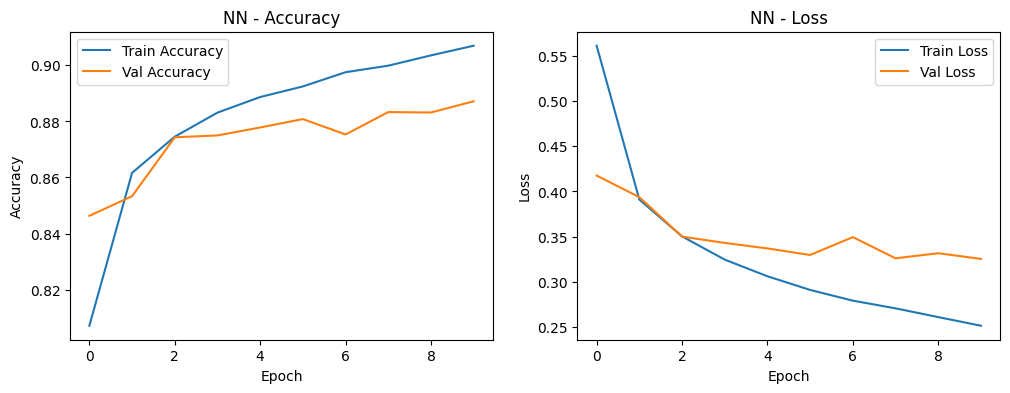

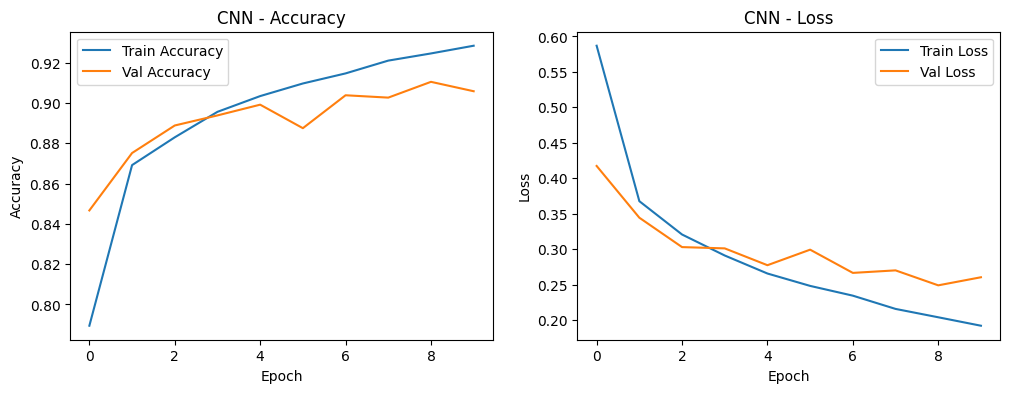

In [7]:
#  Plot Accuracy and Loss

def plot_history(hist, title):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history_nn, "NN")
plot_history(history_cnn, "CNN")


In [8]:
print(f"\n🔍 Final Accuracy Comparison:")
print(f"➡️ Neural Network Accuracy: {nn_acc * 100:.2f}%")
print(f"➡️ Convolutional Neural Network Accuracy: {cnn_acc * 100:.2f}%")
print(f"\n✅ CNN performed better than NN by {(cnn_acc - nn_acc) * 100:.2f}%")



🔍 Final Accuracy Comparison:
➡️ Neural Network Accuracy: 88.18%
➡️ Convolutional Neural Network Accuracy: 89.99%

✅ CNN performed better than NN by 1.81%
